<a href="https://colab.research.google.com/github/LxYuan0420/eat_tensorflow2_in_30_days/blob/master/notebooks/3_3_High_level_API_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3-3 High-level API: Demonstration**


The examples below use high-level APIs in TensorFlow to implement a linear regression model and a DNN binary classification model.

Typically, the high-level APIs are providing the class interfaces for tf.keras.models.

There are three ways of modeling using APIs of Keras: sequential modeling using Sequential function, arbitrary modeling using API functions, and customized modeling by inheriting base class Model.

Here we are demonstrating using Sequential function and customized modeling by inheriting base class Model, respectively.

In [1]:
import tensorflow as tf

# Time stamp
@tf.function
def printbar():
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)


**1. Linear Regression Model**

In this example, we used `Sequential` function to construct the model sequentially and use the predefined method `model.fit` for training (for the beginners).

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow.keras import models,layers,losses,metrics,optimizers

# Number of sample
n = 400

# Generating the datasets
X = tf.random.uniform([n,2],minval=-10,maxval=10) 
w0 = tf.constant([[2.0],[-3.0]])
b0 = tf.constant([[3.0]])
Y = X@w0 + b0 + tf.random.normal([n,1],mean = 0.0,stddev= 2.0)  # @ is matrix multiplication; adding Gaussian noise


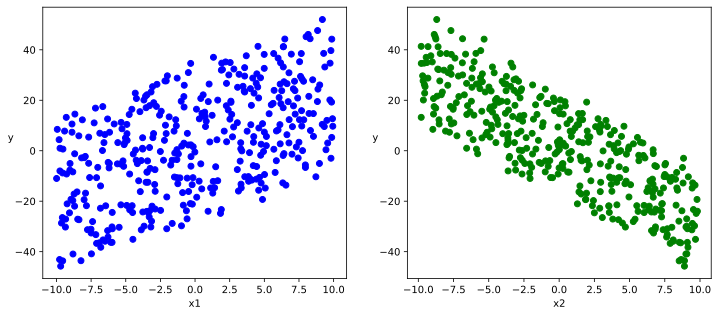

In [3]:
# Data Visualization

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g")
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()

**(b) Model Definition**


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


**(c) Model Training**

In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X, Y, batch_size=10, epochs=200)

tf.print("w=", model.layers[0].kernel)
tf.print("b=", model.layers[0].bias)

Epoch 1/200
40/40 [==============================] - 0s 879us/step - loss: 360.7432 - mae: 15.9705
Epoch 2/200
40/40 [==============================] - 0s 818us/step - loss: 315.5403 - mae: 14.7177
Epoch 3/200
40/40 [==============================] - 0s 814us/step - loss: 320.7499 - mae: 15.0074
Epoch 4/200
40/40 [==============================] - 0s 778us/step - loss: 352.6479 - mae: 16.1352
Epoch 5/200
40/40 [==============================] - 0s 852us/step - loss: 286.3435 - mae: 14.1631
Epoch 6/200
40/40 [==============================] - 0s 992us/step - loss: 326.9171 - mae: 15.4216
Epoch 7/200
40/40 [==============================] - 0s 900us/step - loss: 311.1418 - mae: 14.6979
Epoch 8/200
40/40 [==============================] - 0s 796us/step - loss: 292.7529 - mae: 14.5211
Epoch 9/200
40/40 [==============================] - 0s 984us/step - loss: 278.6974 - mae: 13.9807
Epoch 10/200
40/40 [==============================] - 0s 856us/step - loss: 275.5897 - mae: 14.0678
Epoch 11/

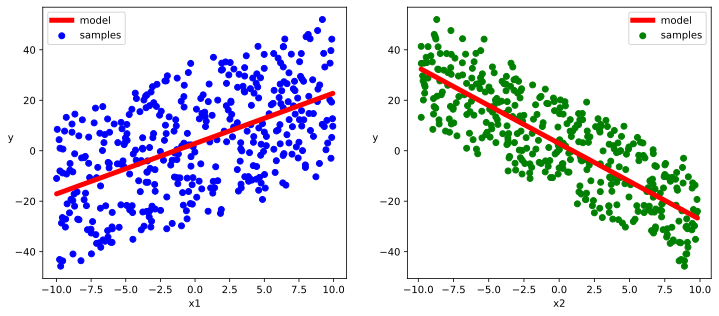

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.variables

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()

**2. DNN Binary Classification Model**

This example demonstrates the customized model using the child class inherited from the base class Model, and use a customized loop for training (for the experts).

(a) Data Preparation

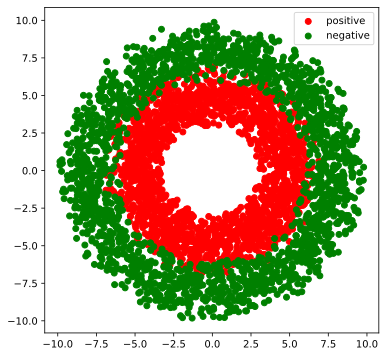

In [7]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,losses,metrics,optimizers
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Number of the positive/negative samples
n_positive,n_negative = 2000,2000

# Generating the positive samples with a distribution on a smaller ring
r_p = 5.0 + tf.random.truncated_normal([n_positive,1],0.0,1.0)
theta_p = tf.random.uniform([n_positive,1],0.0,2*np.pi) 
Xp = tf.concat([r_p*tf.cos(theta_p),r_p*tf.sin(theta_p)],axis = 1)
Yp = tf.ones_like(r_p)

# Generating the negative samples with a distribution on a larger ring
r_n = 8.0 + tf.random.truncated_normal([n_negative,1],0.0,1.0)
theta_n = tf.random.uniform([n_negative,1],0.0,2*np.pi) 
Xn = tf.concat([r_n*tf.cos(theta_n),r_n*tf.sin(theta_n)],axis = 1)
Yn = tf.zeros_like(r_n)

# Assembling all samples
X = tf.concat([Xp,Xn],axis = 0)
Y = tf.concat([Yp,Yn],axis = 0)

# Shuffling the samples
data = tf.concat([X,Y],axis = 1)
data = tf.random.shuffle(data)
X = data[:,:2]
Y = data[:,2:]


# Visualizing the data
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0].numpy(),Xp[:,1].numpy(),c = "r")
plt.scatter(Xn[:,0].numpy(),Xn[:,1].numpy(),c = "g")
plt.legend(["positive","negative"]);


In [8]:
ds_train = tf.data.Dataset.from_tensor_slices((X[0:n*3//4], Y[0:n*3//4])).shuffle(buffer_size=1000).batch(20).prefetch(tf.data.experimental.AUTOTUNE).cache()
ds_valid = tf.data.Dataset.from_tensor_slices((X[n*3//4:,:], Y[n*3//4:,:])).batch(20).prefetch(tf.data.experimental.AUTOTUNE).cache()

**(b) Model Definition**

In [11]:
class DNNModel(tf.keras.models.Model):
    def __init__(self):
        super(DNNModel, self).__init__()

    def build(self, input_shape):
        self.dense1 = tf.keras.layers.Dense(4, activation='relu', name='dense1')
        self.dense2 = tf.keras.layers.Dense(8, activation='relu', name='dense2')
        self.dense3 = tf.keras.layers.Dense(1, activation='sigmoid', name='dense3')
        super(DNNModel, self).build(input_shape)

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, 2], dtype=tf.float32)])
    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        y = self.dense3(x)
        return y

In [12]:
model = DNNModel()
model.build(input_shape=(None, 2))

model.summary()

Model: "dnn_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               multiple                  12        
_________________________________________________________________
dense2 (Dense)               multiple                  40        
_________________________________________________________________
dense3 (Dense)               multiple                  9         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


**(c) Model Training**

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_func = tf.keras.losses.BinaryCrossentropy()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_metric = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

valid_loss = tf.keras.metrics.Mean(name='valid_loss')
valid_metric = tf.keras.metrics.BinaryAccuracy(name='valid_accuracy')


@tf.function
def train_step(model, features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features)
        loss = loss_func(labels, predictions)
    
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_loss.update_state(loss)
    train_metric.update_state(labels, predictions)

@tf.function
def valid_step(model, features, labels):
    predictions = model(features)
    batch_loss = valid_loss(labels, predictions)
    valid_loss.update_state(batch_loss)
    valid_metric.update_state(labels, predictions)

def train_model(model, ds_train, ds_valid, epochs):
    for epoch in tf.range(1, epochs+1):
        for features, labels in ds_train:
            train_step(model, features, labels)

        for features, labels in ds_valid:
            valid_step(model, features, labels)

        logs = "Epoch={}, Loss:{}, Accuracy:{}, Valid loss:{}, valid Accuracy:{}"

        if epoch%100==0:
            printbar()
            tf.print(tf.strings.format(logs,
            (epoch,train_loss.result(),train_metric.result(),valid_loss.result(),valid_metric.result())))

        train_loss.reset_states()
        train_metric.reset_states()
        valid_loss.reset_states()
        valid_metric.reset_states()


In [15]:
train_model(model, ds_train, ds_valid, 1000)

================================================================================14:20:36
Epoch=100, Loss:0.695414126, Accuracy:0.46, Valid loss:0.497557, valid Accuracy:0.457567573
================================================================================14:20:48
Epoch=200, Loss:0.692538679, Accuracy:0.513333321, Valid loss:0.498979181, valid Accuracy:0.498918921
================================================================================14:21:01
Epoch=300, Loss:0.593654454, Accuracy:0.673333347, Valid loss:0.570988953, valid Accuracy:0.710270286
================================================================================14:21:13
Epoch=400, Loss:0.249418318, Accuracy:0.86, Valid loss:0.774090528, valid Accuracy:0.843783796
================================================================================14:21:25
Epoch=500, Loss:0.141161904, Accuracy:0.953333318, Valid loss:0.84296006, valid Accuracy:0.935675681
===============================================================